# Questions answered through this analysis

* Segment distribution.
* Most regions with Quantity sold, Sales and profit?
* Categories Analysis
* States Analysis
* Top Customers? 
* Preferred shipping mode?
* Top items sold and Sub-Category Analysis
* Time Analysis 

In [1]:
#importing libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import squarify 
import datetime

In [3]:
data= pd.read_csv("Sample - Superstore.csv", encoding='windows-1252')
data.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
4398,4399,US-2014-138758,7/7/2014,7/11/2014,Standard Class,JL-15835,John Lee,Consumer,United States,Philadelphia,...,19120,East,FUR-FU-10003039,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Grantwood Wall ...",69.008,2,0.2,12.0764
5832,5833,CA-2016-142895,7/21/2016,7/26/2016,Standard Class,BP-11290,Beth Paige,Consumer,United States,Concord,...,28027,South,OFF-LA-10000262,Office Supplies,Labels,Avery 494,6.264,3,0.2,2.0358
2923,2924,CA-2014-156993,6/28/2014,7/4/2014,Standard Class,RW-19630,Rob Williams,Corporate,United States,Detroit,...,48234,Central,OFF-FA-10003495,Office Supplies,Fasteners,Staples,6.080,1,0.0,3.0400
9057,9058,CA-2015-149097,10/20/2015,10/24/2015,Standard Class,SV-20785,Stewart Visinsky,Consumer,United States,Los Angeles,...,90045,West,FUR-FU-10003424,Furniture,Furnishings,Nu-Dell Oak Frame,74.760,7,0.0,23.9232
5069,5070,CA-2014-124478,8/8/2014,8/12/2014,Standard Class,MA-17560,Matt Abelman,Home Office,United States,Trenton,...,48183,Central,OFF-AP-10002495,Office Supplies,Appliances,"Acco Smartsocket Table Surge Protector, 6 Colo...",167.535,3,0.1,37.2300


In [4]:
data['Order Date']=pd.to_datetime(data['Order Date'], format='%m/%d/%Y')
data['Ship Date']=pd.to_datetime(data['Ship Date'], format='%m/%d/%Y')
data['OrderY']=data['Order Date'].dt.year
data['OrderM']=data['Order Date'].dt.month
data['OrderD']=data['Order Date'].dt.day

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [6]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,OrderY,OrderM,OrderD
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896,2015.722233,7.809686,15.468481
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108,1.123555,3.284654,8.748327
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,2014.000000,1.000000,1.000000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750,2015.000000,5.000000,8.000000
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500,2016.000000,9.000000,15.000000
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000,2017.000000,11.000000,23.000000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,2017.000000,12.000000,31.000000


In [7]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
OrderY           0
OrderM           0
OrderD           0
dtype: int64

In [8]:
data = data.drop(['Row ID'], axis=1)
data.sample(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,OrderY,OrderM,OrderD
1613,CA-2017-138380,2017-12-21,2017-12-25,Standard Class,YS-21880,Yana Sorensen,Corporate,United States,Oakland,California,...,Office Supplies,Storage,Letter Size Cart,1000.020,7,0.0,290.0058,2017,12,21
3582,CA-2015-121650,2015-12-10,2015-12-16,Standard Class,KD-16495,Keith Dawkins,Corporate,United States,Jackson,Michigan,...,Office Supplies,Art,Avery Hi-Liter Comfort Grip Fluorescent Highli...,3.900,2,0.0,1.5210,2015,12,10
1549,CA-2014-134278,2014-07-06,2014-07-08,First Class,EP-13915,Emily Phan,Consumer,United States,New York City,New York,...,Technology,Copiers,Canon Imageclass D680 Copier / Fax,559.992,1,0.2,174.9975,2014,7,6
7830,CA-2015-137302,2015-04-26,2015-05-01,Standard Class,BW-11110,Bart Watters,Corporate,United States,San Diego,California,...,Technology,Phones,RCA ViSYS 25825 Wireless digital phone,311.976,3,0.2,38.9970,2015,4,26
6609,US-2015-118906,2015-03-10,2015-03-10,Same Day,KB-16585,Ken Black,Corporate,United States,Clinton,Maryland,...,Office Supplies,Storage,Pizazz Global Quick File,89.820,6,0.0,25.1496,2015,3,10


In [9]:
data[["Sales","Quantity","Discount","Profit"]].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [10]:
data["State"].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

In [11]:
data["Country"].unique()

array(['United States'], dtype=object)

In [12]:
data["Segment"].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

<AxesSubplot:ylabel='Segment'>

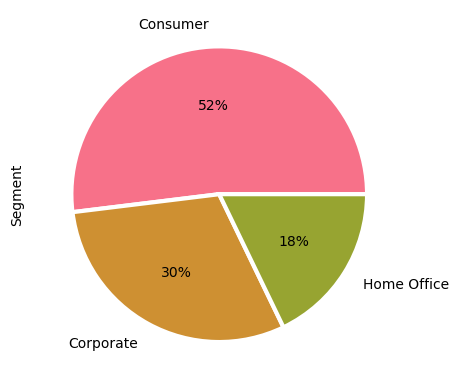

In [13]:
data["Segment"].value_counts().plot.pie(labeldistance=1.15,autopct='%.0f%%', 
                                         wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
                                         colors =sns.color_palette("husl", 8))

In [14]:
data['City'].value_counts()

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

# Region Analysis

In [15]:
data["Region"].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

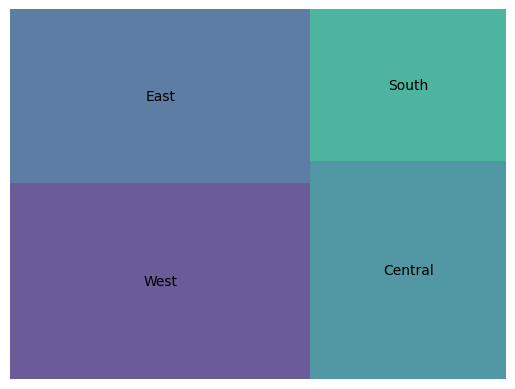

In [16]:
sizes=[3203, 2848,2323, 1620]
label=["West", "East", "Central", "South"]
squarify.plot(sizes=sizes, label=label, alpha=0.8,color=sns.color_palette("viridis"))
plt.axis('off')
plt.show()

<AxesSubplot:xlabel='Region'>

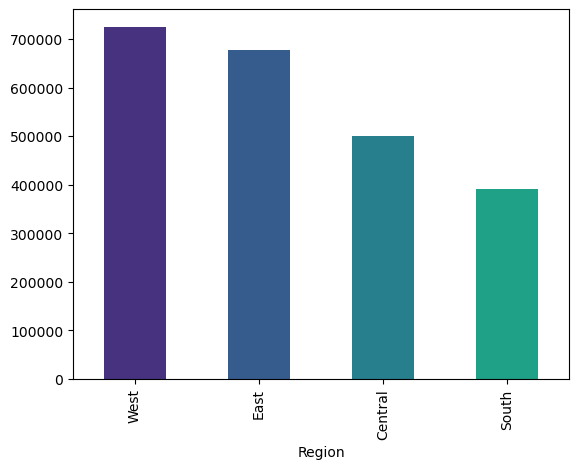

In [17]:
data.groupby('Region')['Sales'].sum().sort_values(ascending=False).plot.bar(color=sns.color_palette("viridis"))

<AxesSubplot:xlabel='Region'>

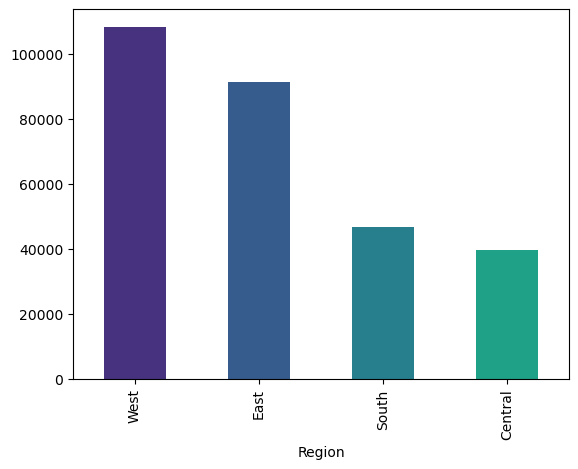

In [18]:
data.groupby('Region')['Profit'].sum().sort_values(ascending=False).plot.bar(color=sns.color_palette("viridis"))

* West is the most region with sales and profit.
* East is the second most region with sales and profit.
* Central region has more sales than South however less Profit.

#  Categories Analysis

In [19]:
data["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

<AxesSubplot:ylabel='Category'>

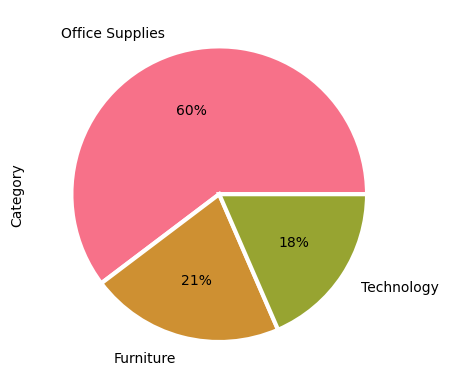

In [20]:
data["Category"].value_counts().plot.pie(labeldistance=1.15,autopct='%.0f%%', 
                                         wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
                                         colors =sns.color_palette("husl", 8))

* Office supplies is dominating with over 60% sold items from total.

# Top States by Sales

<AxesSubplot:ylabel='State'>

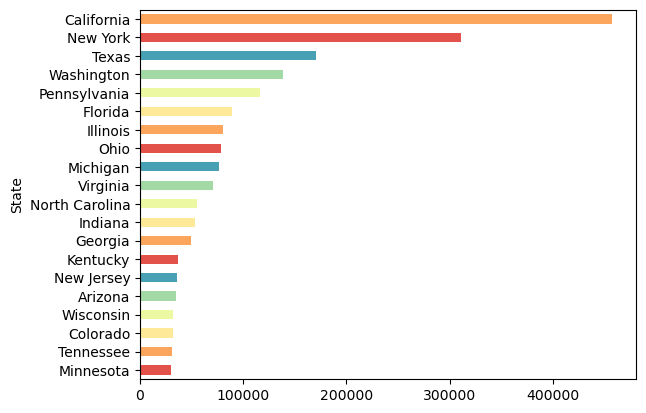

In [21]:
data.groupby('State')['Sales'].sum().sort_values(ascending=True).tail(20).plot.barh(color=sns.color_palette("Spectral"))

# Top States by Profit

<AxesSubplot:ylabel='State'>

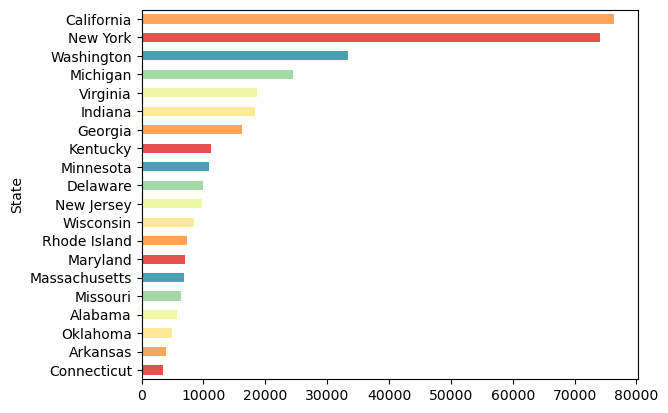

In [22]:
data.groupby('State')['Profit'].sum().sort_values(ascending=True).tail(20).plot.barh(color=sns.color_palette("Spectral"))

* We can notice that the top two states by Sales & Profit is California and New York.

# Sub-Category Analysis

<AxesSubplot:xlabel='Sub-Category'>

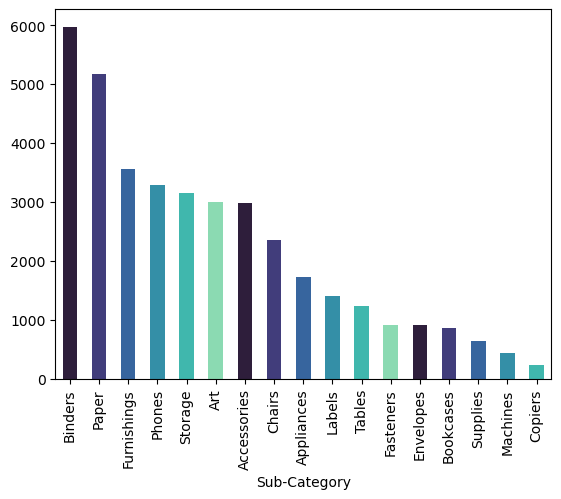

In [23]:
colors= sns.color_palette("rocket")
data.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False).plot.bar(color=sns.color_palette("mako"))

<AxesSubplot:xlabel='Sub-Category'>

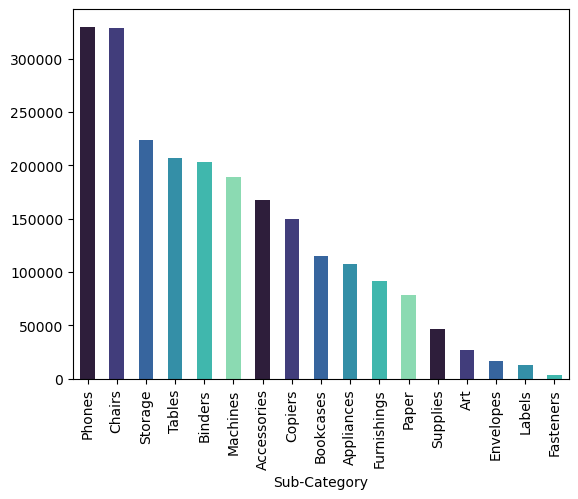

In [24]:
colors= sns.color_palette("rocket")
data.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).plot.bar(color=sns.color_palette("mako"))

* Phones and chairs are the top seller, while Envelopes, labels and fasteners are the least.

<AxesSubplot:xlabel='Sub-Category'>

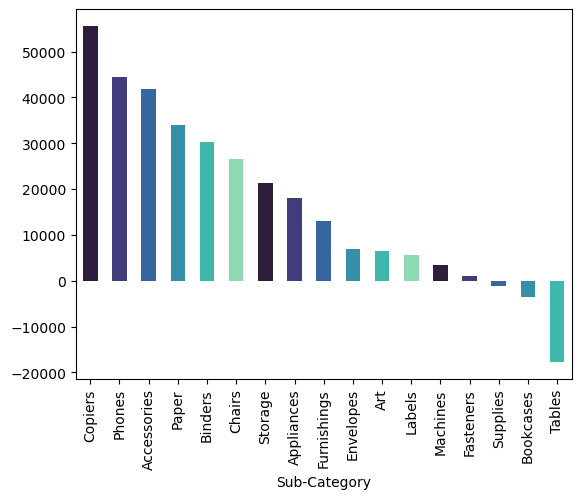

In [25]:
colors= sns.color_palette("rocket")
data.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).plot.bar(color=sns.color_palette("mako"))

* Tables makes high sales ranking 4th, however it impacts profit badly by Negative.
* Even though Copiers werent in the top 5 in best sales and its also the least sold item, it ranks first in Profit.

# States with the most & least Customers

Text(0.5, 1.0, 'States with the most Customers')

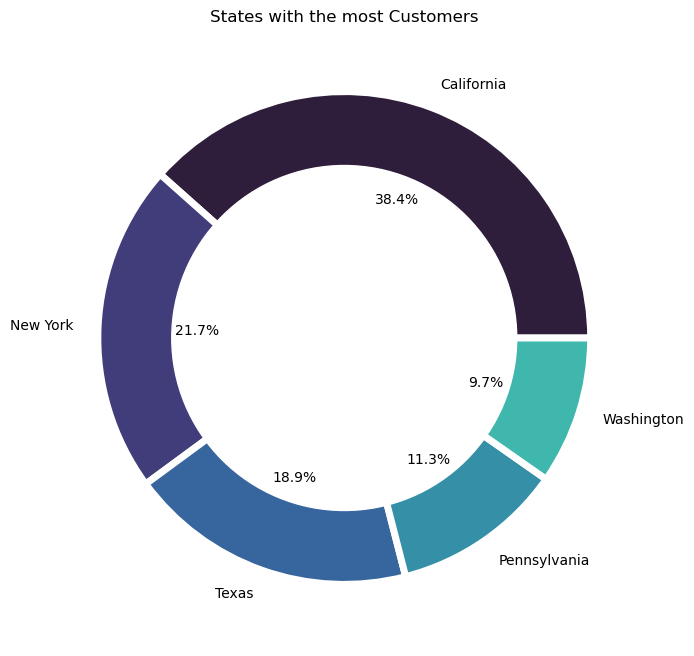

In [26]:
data["State"].value_counts().head(5).plot.pie(autopct='%.1f%%',figsize=(15,8),wedgeprops ={ 'linewidth' : 5, 'edgecolor' : 'white' }, colors=sns.color_palette("mako"))
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel("")
plt.title("States with the most Customers")

Text(0.5, 1.0, 'States with the Least Customers')

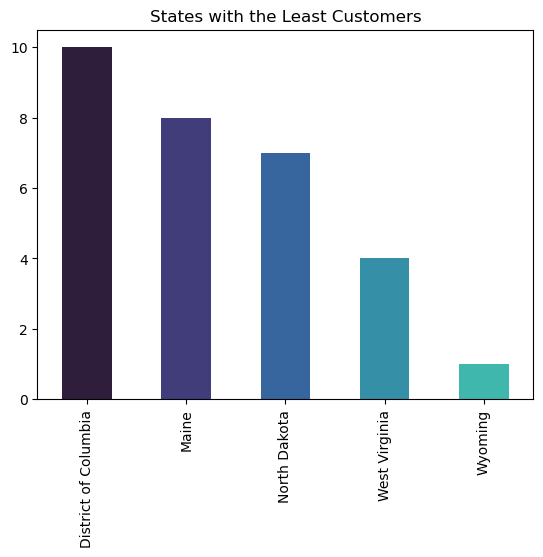

In [27]:
data["State"].value_counts().tail(5).plot.bar(color=sns.color_palette("mako"))
plt.title("States with the Least Customers")

* California is the most important state having the most customers, while Wyoming is the least.

# Customers with the most purchased items

In [28]:
data.groupby("Customer Name")["Quantity"].sum().sort_values().tail(5)

Customer Name
Steven Cartwright    133
Paul Prost           138
John Lee             143
William Brown        146
Jonathan Doherty     150
Name: Quantity, dtype: int64

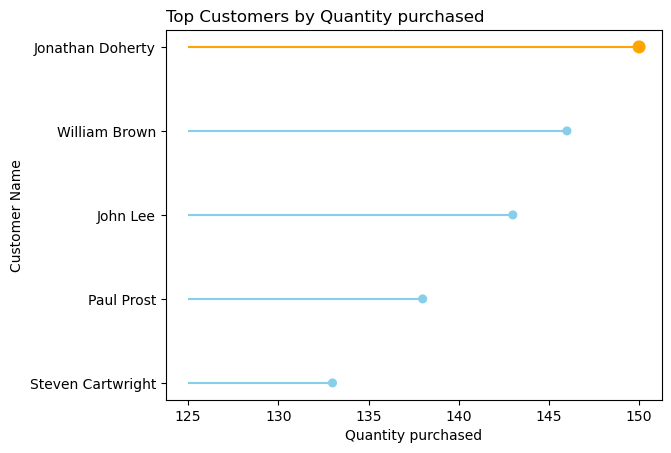

In [29]:
df = pd.DataFrame({'group':("Jonathan Doherty","William Brown","John Lee","Paul Prost","Steven Cartwright"), 
                   'values':(150,146,143,138,133) })

ordered_df = df.sort_values(by='values')
my_range=range(1,len(df.index)+1)

my_color=np.where(ordered_df ['group']=='Jonathan Doherty', 'orange', 'skyblue')
my_size=np.where(ordered_df ['group']=='Jonathan Doherty', 70, 30)

plt.hlines(y=my_range, xmin=125, xmax=ordered_df['values'], color=my_color)
plt.scatter(ordered_df['values'], my_range, color=my_color, s=my_size)

plt.yticks(my_range, ordered_df['group'])
plt.title("Top Customers by Quantity purchased", loc='left')
plt.xlabel('Quantity purchased')
plt.ylabel('Customer Name')

plt.show()

# Customers who made the top sales & profits

In [30]:
data.groupby("Customer Name")["Sales"].sum().sort_values().tail(5)

Customer Name
Adrian Barton    14473.571
Tom Ashbrook     14595.620
Raymond Buch     15117.339
Tamara Chand     19052.218
Sean Miller      25043.050
Name: Sales, dtype: float64

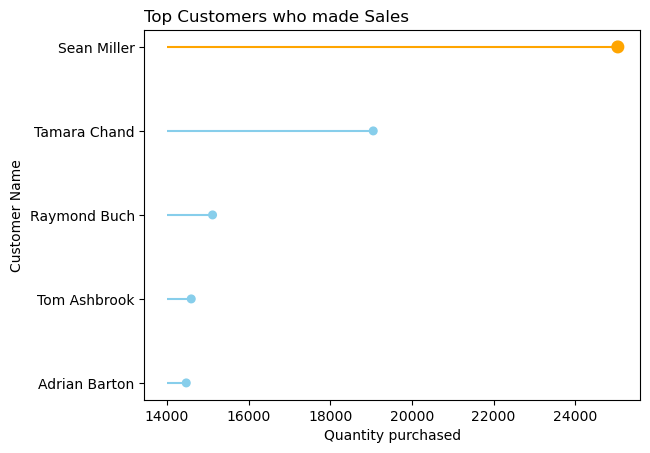

In [31]:
df = pd.DataFrame({'group':("Sean Miller","Tamara Chand","Raymond Buch","Tom Ashbrook","Adrian Barton"), 
                   'values':(25043,19052,15117,14595,14473)})

ordered_df = df.sort_values(by='values')
my_range=range(1,len(df.index)+1)

my_color=np.where(ordered_df ['group']=='Sean Miller', 'orange', 'skyblue')
my_size=np.where(ordered_df ['group']=='Sean Miller', 70, 30)

plt.hlines(y=my_range, xmin=14000, xmax=ordered_df['values'], color=my_color)
plt.scatter(ordered_df['values'], my_range, color=my_color, s=my_size)

plt.yticks(my_range, ordered_df['group'])
plt.title("Top Customers who made Sales", loc='left')
plt.xlabel('Quantity purchased')
plt.ylabel('Customer Name')

plt.show()

* Sean Miller was the most customer who made sales equaling 25043$.

In [32]:
df1 = pd.DataFrame(data.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False))

In [33]:
df1.quantile(0.7, interpolation='higher')

Sales    3288.11
Name: 0.7, dtype: float64

In [34]:
df1[df1['Sales']>=3288.11].sum()/data['Sales'].sum()

Sales    0.609223
dtype: float64

* Top 30% of customers occupy 60% of Sales!

In [35]:
data.groupby("Customer Name")["Profit"].sum().sort_values().tail(5)

Customer Name
Adrian Barton    5444.8055
Hunter Lopez     5622.4292
Sanjit Chand     5757.4119
Raymond Buch     6976.0959
Tamara Chand     8981.3239
Name: Profit, dtype: float64

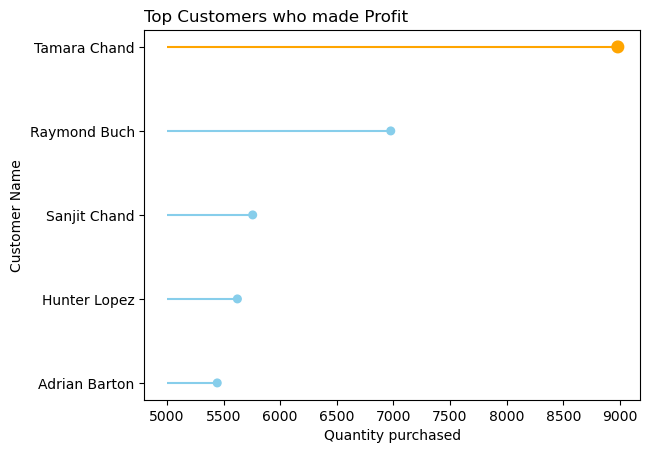

In [36]:
df = pd.DataFrame({'group':("Tamara Chand","Raymond Buch","Sanjit Chand","Hunter Lopez","Adrian Barton"), 
                   'values':(8981,6976,5757,5622,5444)})

ordered_df = df.sort_values(by='values')
my_range=range(1,len(df.index)+1)

my_color=np.where(ordered_df ['group']=='Tamara Chand', 'orange', 'skyblue')
my_size=np.where(ordered_df ['group']=='Tamara Chand', 70, 30)

plt.hlines(y=my_range, xmin=5000, xmax=ordered_df['values'], color=my_color)
plt.scatter(ordered_df['values'], my_range, color=my_color, s=my_size)

plt.yticks(my_range, ordered_df['group'])
plt.title("Top Customers who made Profit", loc='left')
plt.xlabel('Quantity purchased')
plt.ylabel('Customer Name')

plt.show()

* Tamara Chand made the highest profit of 8981 dollars out of 19052 dollars total sales.

In [37]:
df2 = pd.DataFrame(data.groupby("Customer Name")["Profit"].sum().sort_values(ascending=False))

In [38]:
df2.quantile(0.7, interpolation='higher')

Profit    463.269
Name: 0.7, dtype: float64

In [39]:
df2[df2['Profit']>=463.269].sum()/data['Profit'].sum()

Profit    0.971351
dtype: float64

* Top 30% of customers occupy 97% of Profit! It means that how we can manage top 30% profit customers is very important !

# Shipping mode Analysis

Text(0.5, 1.0, 'Shipping mode distribution')

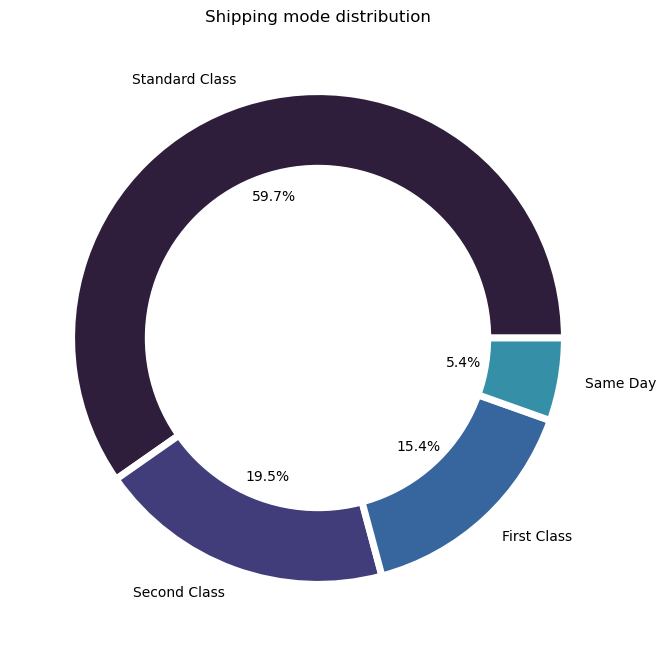

In [40]:
data["Ship Mode"].value_counts().plot.pie(autopct='%.1f%%',figsize=(15,8),wedgeprops={'linewidth':5,'edgecolor':'white'},colors=sns.color_palette("mako"))
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel("")
plt.title("Shipping mode distribution")

# Time Analysis

Text(0.5, 1.0, 'Sales per Year')

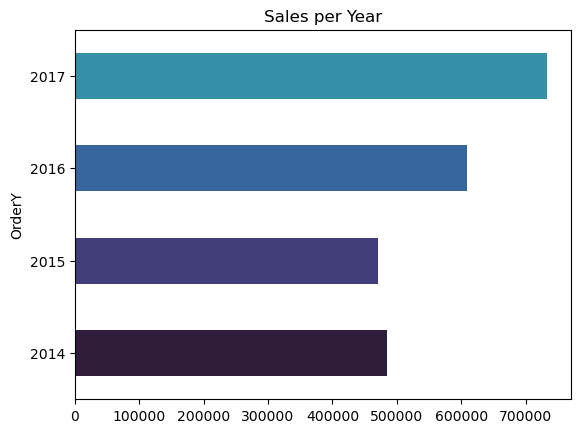

In [41]:
data.groupby('OrderY')['Sales'].sum().plot.barh(color=sns.color_palette("mako"))
plt.title("Sales per Year")

Text(0.5, 1.0, 'Profit per Year')

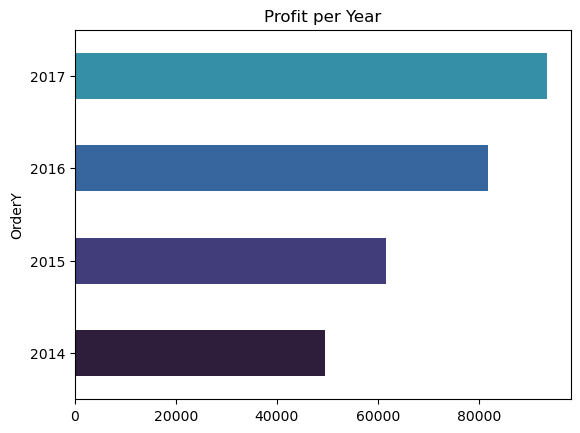

In [42]:
data.groupby('OrderY')['Profit'].sum().plot.barh(color=sns.color_palette("mako"))
plt.title("Profit per Year")

* Profit and sales is increasing year after year.

Text(0.5, 1.0, 'Sales Time Series')

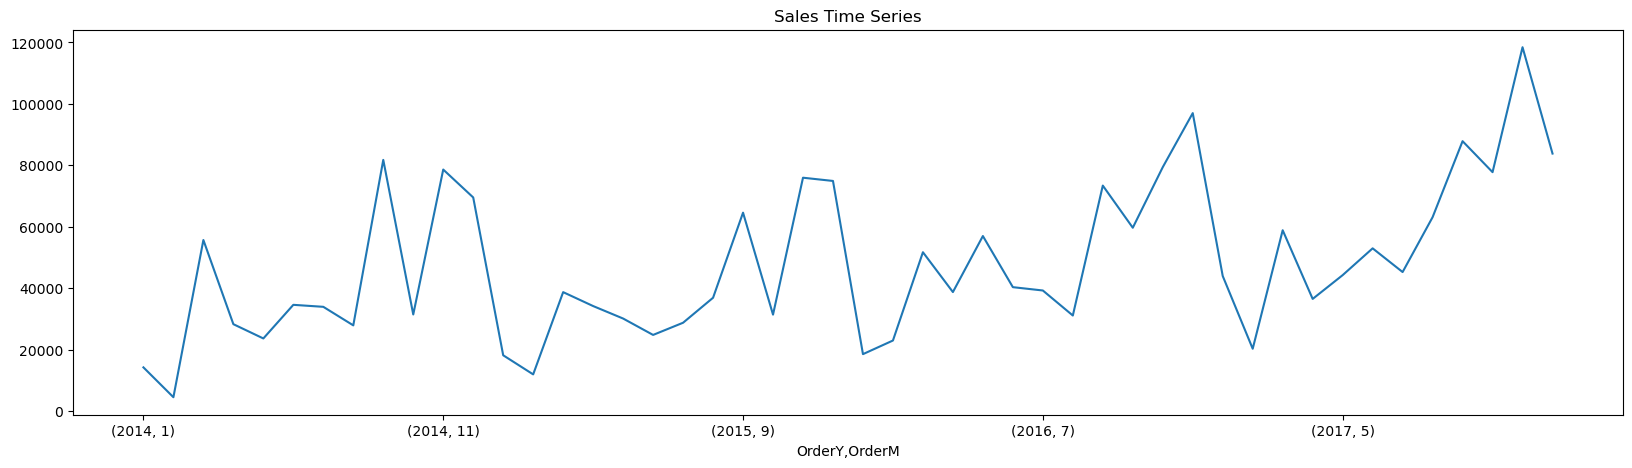

In [43]:
plt.figure(figsize=(20,5))
data.groupby(["OrderY","OrderM"])["Sales"].sum().plot()
plt.title("Sales Time Series")

Text(0.5, 1.0, 'Profit Time Series')

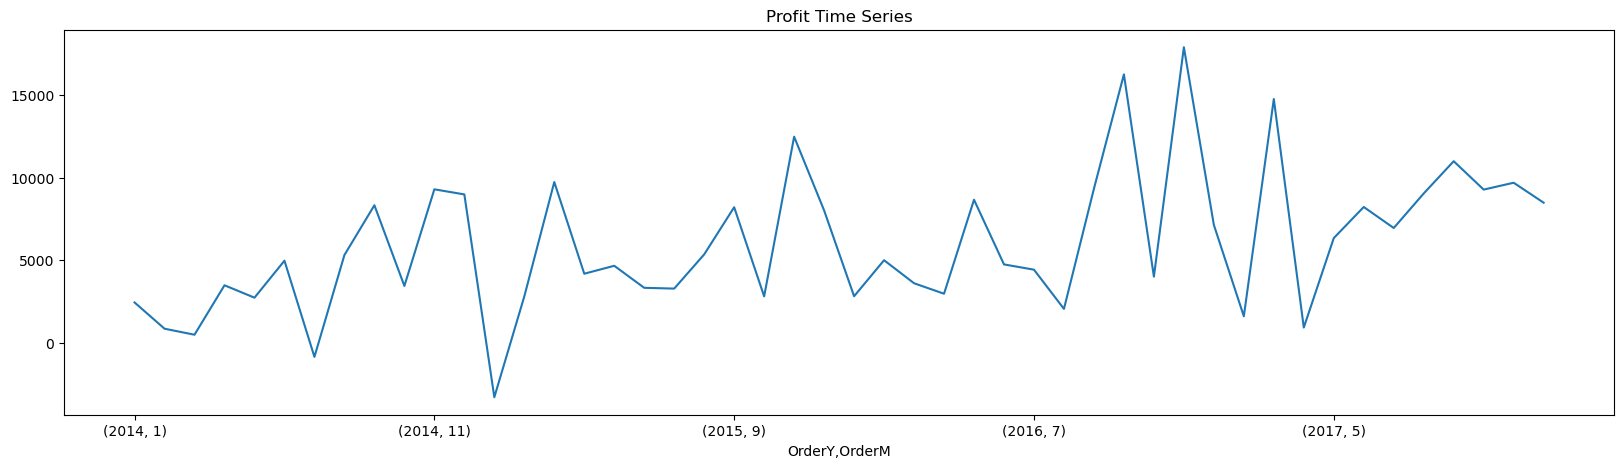

In [44]:
plt.figure(figsize=(20,5))
data.groupby(["OrderY","OrderM"])["Profit"].sum().plot()
plt.title("Profit Time Series")